<a href="https://colab.research.google.com/github/kanikaarawat/Optimized-Cnn/blob/main/Minor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.2 MB/s eta 0:00:00


In [9]:
!unzip -o /content/MISD.zip -d /content/MISD


Archive:  /content/MISD.zip
  inflating: /content/MISD/Dataset/Au/Au_ani_00001.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00002.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00003.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00004.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00005.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00007.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00009.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00010.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00011.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00012.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00013.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00014.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00017.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00018.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00019.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00021.jpg  
  inflating: /content/MISD/Dataset/Au/Au_ani_00023.jpg  
  i

In [14]:

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import keras_tuner as kt

In [16]:
import os
import numpy as np
from PIL import Image

# Set the paths to the MISD dataset directories
authentic_folder = '/content/MISD/Dataset/Au'
spliced_folder = '/content/MISD/Dataset/Sp'


# Desired size for resizing images (adjust as needed)
img_size = (256, 256)

def load_MISD_images_and_labels(auth_folder, spliced_folder, img_size):
    images = []
    labels = []

    # Process authentic images (label=0)
    for file_name in os.listdir(auth_folder):
        # Adjust the extensions as needed. MISD authentic images are in JPEG format.
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(auth_folder, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize(img_size)
                img_array = np.array(img) / 255.0
                images.append(img_array)
                labels.append(0)  # Authentic
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    # Process spliced (forged) images (label=1)
    for file_name in os.listdir(spliced_folder):
        # Adjust the extensions as needed. MISD spliced images are in PNG format.
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(spliced_folder, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize(img_size)
                img_array = np.array(img) / 255.0
                images.append(img_array)
                labels.append(1)  # Spliced/forged
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    return np.array(images), np.array(labels)

# Load images and labels from the MISD dataset
all_images, all_labels = load_MISD_images_and_labels(authentic_folder, spliced_folder, img_size)

print("Total images:", len(all_images))
print("Total labels:", len(all_labels))
print("Authentic images count:", np.sum(all_labels == 0))
print("Spliced images count:", np.sum(all_labels == 1))

Total images: 922
Total labels: 922
Authentic images count: 619
Spliced images count: 303


In [17]:
import os

# Set the MISD dataset path
misd_authentic_folder = "/content/MISD/Dataset/Au"
misd_spliced_folder = "/content/MISD/Dataset/Sp"

# List all files in the authentic folder
authentic_files = sorted(os.listdir(misd_authentic_folder))
print("Total authentic images:", len(authentic_files))
print("Sample authentic files:", authentic_files[:20])  # First 20 authentic images

# List all files in the spliced folder
spliced_files = sorted(os.listdir(misd_spliced_folder))
print("\nTotal spliced images:", len(spliced_files))
print("Sample spliced files:", spliced_files[:20])  # First 20 spliced images


Total authentic images: 620
Sample authentic files: ['Au_ani_00001.jpg', 'Au_ani_00002.jpg', 'Au_ani_00003.jpg', 'Au_ani_00004.jpg', 'Au_ani_00005.jpg', 'Au_ani_00007.jpg', 'Au_ani_00009.jpg', 'Au_ani_00010.jpg', 'Au_ani_00011.jpg', 'Au_ani_00012.jpg', 'Au_ani_00013.jpg', 'Au_ani_00014.jpg', 'Au_ani_00017.jpg', 'Au_ani_00018.jpg', 'Au_ani_00019.jpg', 'Au_ani_00021.jpg', 'Au_ani_00023.jpg', 'Au_ani_00025.jpg', 'Au_ani_00026.jpg', 'Au_ani_00027.jpg']

Total spliced images: 303
Sample spliced files: ['SP_D_nat_30627_ani_00025_ani_00088_ani_00083_238.jpg', 'Sp_D_ cha_00011_cha_00010_pla_0002_162.jpg', 'Sp_D_ cha_00024_nat_00023_art_00037_236.jpg', 'Sp_D_ani_00010_cha_00065_nat_00093_146.jpg', 'Sp_D_ani_00018_ani_00011_ani_00057_ani_00055_7.jpg', 'Sp_D_ani_00018_ani_00019_ani_00074_pla_00082_231.jpg', 'Sp_D_ani_0001_ani_0001_ani_0001_ani_0010_ani0010_ani_0010_ani_0076_107.jpg', 'Sp_D_ani_0001_art_0014_sec_0077_292.jpg', 'Sp_D_ani_0001_cha_00063_sec_00081_202.jpg', 'Sp_D_ani_00021_ani_00039_

In [18]:
import os
import numpy as np
from PIL import Image

# Paths to MISD dataset folders
authentic_folder = '/content/MISD/Dataset/Au'
spliced_folder = '/content/MISD/Dataset/Sp'
img_size = (256, 256)

def load_MISD_images_and_labels(auth_folder, spliced_folder, img_size):
    images = []
    labels = []

    # Load authentic images (label 0)
    for file_name in sorted(os.listdir(auth_folder)):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.tif')):
            file_path = os.path.join(auth_folder, file_name)
            img = Image.open(file_path).convert('RGB')
            img = img.resize(img_size)
            img_array = np.array(img) / 255.0
            images.append(img_array)
            labels.append(0)

    # Load spliced (forged) images (label 1)
    for file_name in sorted(os.listdir(spliced_folder)):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.tif')):
            file_path = os.path.join(spliced_folder, file_name)
            img = Image.open(file_path).convert('RGB')
            img = img.resize(img_size)
            img_array = np.array(img) / 255.0
            images.append(img_array)
            labels.append(1)

    return np.array(images), np.array(labels)

# Load images and labels
all_images, all_labels = load_MISD_images_and_labels(authentic_folder, spliced_folder, img_size)

# Display dataset stats
print("Total images loaded:", len(all_images))
print("Total authentic:", np.sum(all_labels == 0))
print("Total spliced:", np.sum(all_labels == 1))


Total images loaded: 922
Total authentic: 619
Total spliced: 303


In [19]:
from sklearn.model_selection import train_test_split

# Split into train+val and test (80/20), with stratification
X_train_val, X_test, y_train_val, y_test = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)

# Split train+val into train and validation (75/25 of 80%, i.e., 60/20)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

# Print final split sizes
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Train set size: 552
Validation set size: 185
Test set size: 185


In [22]:
import os
import numpy as np
from PIL import Image

def load_MISD_images_and_labels(auth_folder, spliced_folder, img_size=(256, 256)):
    images = []
    labels = []

    # Load authentic images (label = 0)
    for file_name in sorted(os.listdir(auth_folder)):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(auth_folder, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize(img_size)
                img_array = np.array(img) / 255.0
                images.append(img_array)
                labels.append(0)
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    # Load spliced (forged) images (label = 1)
    for file_name in sorted(os.listdir(spliced_folder)):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(spliced_folder, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize(img_size)
                img_array = np.array(img) / 255.0
                images.append(img_array)
                labels.append(1)
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    return np.array(images), np.array(labels)


In [23]:
authentic_folder = '/content/MISD/Dataset/Au'
spliced_folder = '/content/MISD/Dataset/Sp'
all_images, all_labels = load_MISD_images_and_labels(authentic_folder, spliced_folder)


In [25]:
from sklearn.model_selection import train_test_split

# First split: 80% train+val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    all_images,
    all_labels,
    test_size=0.2,
    random_state=42,
    stratify=all_labels
)

# Second split: from train_val => 75% train, 25% val (which makes it 60% train, 20% val, 20% test overall)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.25,
    random_state=42,
    stratify=y_train_val
)

# Summary
print("Train authentic:", sum(y_train==0))
print("Train forged:", sum(y_train==1))
print("Validation authentic:", sum(y_val==0))
print("Validation forged:", sum(y_val==1))
print("Test authentic:", sum(y_test==0))
print("Test forged:", sum(y_test==1))



Train authentic: 371
Train forged: 181
Validation authentic: 124
Validation forged: 61
Test authentic: 124
Test forged: 61


In [26]:
from tensorflow import keras
from tensorflow.keras import layers, Sequential

# Use img_size = (256, 256) as defined earlier
def build_model(hp):
    model = Sequential()

    # Number of convolutional layers (between 3 and 5)
    num_conv_layers = hp.Int('num_conv_layers', min_value=3, max_value=5, step=1)

    # First Conv2D layer (with input shape)
    filters = hp.Int('filters_0', min_value=32, max_value=128, step=32)
    kernel_size = hp.Choice('kernel_size_0', values=[3, 5])
    model.add(layers.Conv2D(filters=filters, kernel_size=(kernel_size, kernel_size),
                            activation='relu', padding='same',
                            input_shape=(img_size[0], img_size[1], 3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Optional dropout after first conv block
    dropout_rate = hp.Float('dropout_rate_0', min_value=0.0, max_value=0.5, step=0.1)
    if dropout_rate > 0:
        model.add(layers.Dropout(dropout_rate))

    # Additional convolutional layers
    for i in range(1, num_conv_layers):
        filters = hp.Int(f'filters_{i}', min_value=32, max_value=128, step=32)
        kernel_size = hp.Choice(f'kernel_size_{i}', values=[3, 5])
        model.add(layers.Conv2D(filters=filters,
                                kernel_size=(kernel_size, kernel_size),
                                activation='relu', padding='same'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))

        dropout_rate = hp.Float(f'dropout_rate_{i}', min_value=0.0, max_value=0.5, step=0.1)
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))

    # Flatten and dense layer
    model.add(layers.Flatten())
    model.add(layers.Dense(units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
                           activation='relu'))

    dense_dropout = hp.Float('dense_dropout', min_value=0.0, max_value=0.5, step=0.1)
    if dense_dropout > 0:
        model.add(layers.Dropout(dense_dropout))

    # Output layer for binary classification (authentic vs spliced)
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile model
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [27]:
import keras_tuner as kt

tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,              # You can increase this for deeper search
    executions_per_trial=1,     # Set to >1 to average results for stability
    directory='misd_tuner_dir', # Folder to store tuning logs/results
    project_name='misd_cnn_bayes'
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

tuner.search(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[stop_early]
)


Trial 10 Complete [00h 01m 25s]
val_accuracy: 0.6702702641487122

Best val_accuracy So Far: 0.6810810565948486
Total elapsed time: 00h 09m 54s


In [29]:



best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best number of Conv layers:", best_hps.get('num_conv_layers'))
print("Best initial filters:", best_hps.get('filters_0'))
print("Best kernel size:", best_hps.get('kernel_size_0'))
print("Best dropout rate (first layer):", best_hps.get('dropout_rate_0'))
print("Best dense units:", best_hps.get('dense_units'))
print("Best dense dropout:", best_hps.get('dense_dropout'))
print("Best learning rate:", best_hps.get('learning_rate'))


Best number of Conv layers: 4
Best initial filters: 64
Best kernel size: 3
Best dropout rate (first layer): 0.1
Best dense units: 64
Best dense dropout: 0.2
Best learning rate: 0.0006991788785687053


In [30]:
# Build the model using the best hyperparameters from the tuner
model = tuner.hypermodel.build(best_hps)

# Train the model on the MISD dataset
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[stop_early]
)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 374ms/step - accuracy: 0.6052 - loss: 0.6725 - val_accuracy: 0.6703 - val_loss: 0.6425
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.6767 - loss: 0.6620 - val_accuracy: 0.6703 - val_loss: 0.6398
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.6723 - loss: 0.6322 - val_accuracy: 0.6703 - val_loss: 0.6331
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.6845 - loss: 0.6226 - val_accuracy: 0.6703 - val_loss: 0.6357
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.6460 - loss: 0.6513 - val_accuracy: 0.6703 - val_loss: 0.6255
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.6623 - loss: 0.6202 - val_accuracy: 0.6703 - val_loss: 0.6445
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6914 - loss: 0.6287 - val_accuracy: 0.6703 - val_loss: 0.6314
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.6495 - loss: 0.6332 - val_accuracy: 0

In [31]:
# Evaluate the model on the MISD test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy on MISD dataset:", test_acc)

# Import metrics
from sklearn.metrics import classification_report, roc_auc_score

# Predict probabilities on test set
y_pred_proba = model.predict(X_test)
# Convert probabilities to binary predictions
y_pred = (y_pred_proba > 0.5).astype("int32")

# Print classification report and AUC
print("Classification Report for MISD dataset:")
print(classification_report(y_test, y_pred))
print("AUC for MISD dataset:", roc_auc_score(y_test, y_pred_proba))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6988 - loss: 0.6422
Test Accuracy on MISD dataset: 0.6810810565948486
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step
Classification Report for MISD dataset:
              precision    recall  f1-score   support

           0       0.69      0.96      0.80       124
           1       0.58      0.11      0.19        61

    accuracy                           0.68       185
   macro avg       0.64      0.54      0.50       185
weighted avg       0.65      0.68      0.60       185

AUC for MISD dataset: 0.5744315177154944


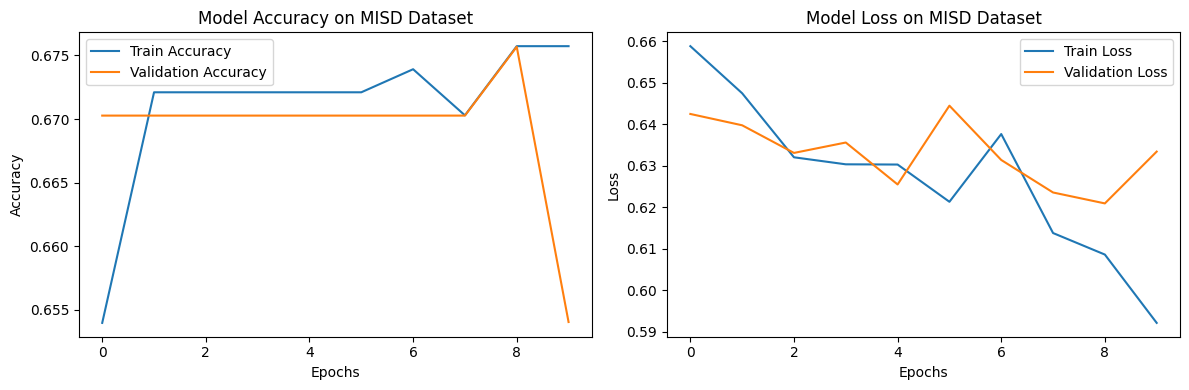

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy on MISD Dataset')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss on MISD Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


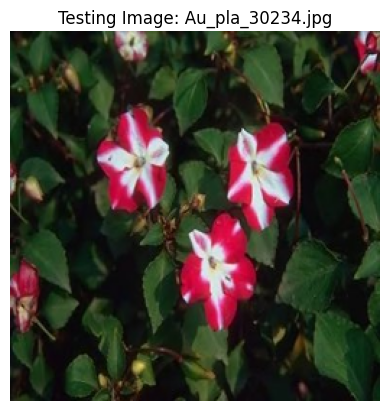

In [52]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Folder containing MISD images (both Au and Sp)
misd_folder = '/content/MISD/Dataset'
all_misd_images = []

# Collect image paths from both authentic and spliced folders
for subfolder in ['Au', 'Sp']:
    subfolder_path = os.path.join(misd_folder, subfolder)
    image_files = [os.path.join(subfolder_path, f) for f in os.listdir(subfolder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    all_misd_images.extend(image_files)

# Select a random image
random_image_path = random.choice(all_misd_images)

# Load the image
img = Image.open(random_image_path).convert('RGB')
img_resized = img.resize((256, 256))

# Normalize the image
img_array = np.array(img_resized) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Display the image
plt.imshow(img_resized)
plt.axis("off")
plt.title(f"Testing Image: {os.path.basename(random_image_path)}")
plt.show()


In [53]:
# Make prediction on the selected image
prediction = model.predict(img_array)[0][0]  # Single image prediction

from sklearn.metrics import precision_recall_curve
import numpy as np

# Predict probabilities on the validation set
y_pred_proba = model.predict(X_val).flatten()

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)

# Calculate F1 scores for each threshold
f1_scores = (2 * precision * recall) / (precision + recall + 1e-8)  # Add epsilon to avoid division by zero
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Decision Threshold:", best_threshold)

# Use best threshold for final predictions
threshold = best_threshold
y_pred = (y_pred_proba > threshold).astype(int)

# Interpret the result for the single image
if prediction >= threshold:
    print(f"🔴 The model predicts this image is **FORGED** with confidence: {prediction:.4f}")
else:
    print(f"🟢 The model predicts this image is **AUTHENTIC** with confidence: {1 - prediction:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Best Decision Threshold: 0.39915588
🟢 The model predicts this image is **AUTHENTIC** with confidence: 0.8060


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


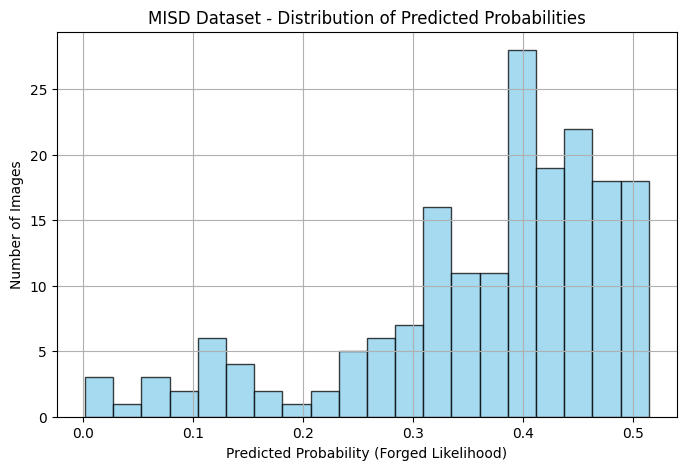

In [35]:
import matplotlib.pyplot as plt

# Predict probabilities on the test set
y_pred_proba = model.predict(X_test)

# Plot histogram of predicted probabilities
plt.figure(figsize=(8, 5))
plt.hist(y_pred_proba, bins=20, color='skyblue', edgecolor='black', alpha=0.75)
plt.xlabel("Predicted Probability (Forged Likelihood)")
plt.ylabel("Number of Images")
plt.title("MISD Dataset - Distribution of Predicted Probabilities")
plt.grid(True)
plt.show()


In [36]:
# Get flattened predicted probabilities
y_pred_proba = model.predict(X_test).flatten()

# Print the first 20 predictions with interpretation
print("MISD Dataset - Sample Predictions on Test Set:")
for i in range(20):
    label = "FORGED" if y_pred_proba[i] >= 0.5 else "AUTHENTIC"
    print(f"Image {i+1}: Probability = {y_pred_proba[i]:.4f}, Classified as: {label}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
MISD Dataset - Sample Predictions on Test Set:
Image 1: Probability = 0.4894, Classified as: AUTHENTIC
Image 2: Probability = 0.3584, Classified as: AUTHENTIC
Image 3: Probability = 0.3176, Classified as: AUTHENTIC
Image 4: Probability = 0.2622, Classified as: AUTHENTIC
Image 5: Probability = 0.3319, Classified as: AUTHENTIC
Image 6: Probability = 0.2577, Classified as: AUTHENTIC
Image 7: Probability = 0.0764, Classified as: AUTHENTIC
Image 8: Probability = 0.4647, Classified as: AUTHENTIC
Image 9: Probability = 0.3967, Classified as: AUTHENTIC
Image 10: Probability = 0.3850, Classified as: AUTHENTIC
Image 11: Probability = 0.4349, Classified as: AUTHENTIC
Image 12: Probability = 0.4722, Classified as: AUTHENTIC
Image 13: Probability = 0.0633, Classified as: AUTHENTIC
Image 14: Probability = 0.4488, Classified as: AUTHENTIC
Image 15: Probability = 0.4737, Classified as: AUTHENTIC
Image 16: Probability = 0.4882, Classified as: AUTHENTIC
Image 17: Pr

In [37]:
import numpy as np

# MISD Dataset - Count of Authentic vs Forged Images
print("MISD Dataset Summary:")
print("Total Authentic Images:", np.sum(all_labels == 0))
print("Total Forged Images:", np.sum(all_labels == 1))


MISD Dataset Summary:
Total Authentic Images: 619
Total Forged Images: 303
